In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

In [5]:
streams2019=pd.read_csv('../data/streams_2019-01-01__2020-01-01.csv',sep=',', header=0)
streams2019.head()

,Position,Track Name,Artist,Streams,URL,date,region,track_id
0,1,"thank u, next",Ariana Grande,3978028,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-01,Global,2rPE9A1vEgShuZxxzR2tZH
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3883836,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019-01-01,Global,3KkXRkHbMCARz0aVfEt68P
2,3,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,3351784,https://open.spotify.com/track/4w8niZpiMy6qz1m...,2019-01-01,Global,4w8niZpiMy6qz1mntFA5uM
3,4,Wow.,Post Malone,3195966,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019-01-01,Global,6MWtB6iiXyIwun0YzU6DFP
4,5,MIA (feat. Drake),Bad Bunny,2777884,https://open.spotify.com/track/116H0KvKr2Zl4RP...,2019-01-01,Global,116H0KvKr2Zl4RPuVBruDO


In [6]:
#table with max streams in 2019 for each track id
max_streams=streams2019.groupby(['track_id','Artist'])['Streams'].max().to_frame('max streams').reset_index()
max_streams.columns=['track_id','artist','max streams']
max_streams.head()

,track_id,artist,max streams
0,00ko9WaS4jOX1kEk3gvHjf,Chance the Rapper,1486284
1,00v5O7qsglyTtp2q1M9DZr,Beyoncé,1155602
2,01DOm09B2AbiTARAbXVI6g,ScHoolboy Q,1287930
3,01GmGxOPy22EdAZGC0X6q1,Chance the Rapper,812040
4,01Qb6dN5suQNu87VJ1mIpf,Lil Tecca,832509


In [7]:
song_features=pd.read_csv('../data/song_features_2019-01-01__2020-01-01.csv',sep=',', header=0)
song_features.head()

,track_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.2800,0.000000,0.724,1,207333,-5.642,1,0.435
1,3KkXRkHbMCARz0aVfEt68P,0.479,0.0703,89.911,0.0466,0.5560,0.000000,0.760,2,158040,-5.574,1,0.913
2,4w8niZpiMy6qz1mntFA5uM,0.801,0.0642,95.881,0.2280,0.1570,0.000005,0.842,8,212500,-4.167,0,0.617
3,6MWtB6iiXyIwun0YzU6DFP,0.539,0.1010,99.947,0.1780,0.1630,0.000002,0.833,11,149520,-7.399,0,0.385
4,116H0KvKr2Zl4RPuVBruDO,0.539,0.0990,97.062,0.0621,0.0141,0.000496,0.817,6,210368,-6.349,0,0.158


In [8]:
artists_info=pd.read_csv('../data/artist_info_2019-01-01__2020-01-01.csv',sep=',',header=0)
artists_info.head()

,artist,genres,popularity,followers,artist_id
0,Ariana Grande,"['dance pop', 'pop']",93,72091927,66CXWjxzNUsdJxJ2JdwvnR
1,Post Malone,"['dfw rap', 'melodic rap', 'rap']",91,34933440,246dkjvS1zLTtiykXe5h60
2,DJ Snake,"['dance pop', 'edm', 'electronic trap', 'pop',...",82,7611219,540vIaP2JwjQb9dm3aArA4
3,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",96,39969523,4q3ewBCX7sLwd24euuV69X
4,Travis Scott,"['rap', 'slap house']",92,18998139,0Y5tJX1MQlPlqiwlOH1tJY


In [9]:
#Join of the 3 tables
df=pd.merge(max_streams, song_features, on=["track_id"])
df=pd.merge(df, artists_info, on=["artist"])
df.head()

,track_id,artist,max streams,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence,genres,popularity,followers,artist_id
0,00ko9WaS4jOX1kEk3gvHjf,Chance the Rapper,1486284,0.509,0.0573,150.001,0.387,0.00157,0.0,0.899,9,225924,-8.040,1,0.599,"['chicago rap', 'conscious hip hop', 'hip hop'...",79,5467262,1anyVhU62p31KFi8MEzkbf
1,01GmGxOPy22EdAZGC0X6q1,Chance the Rapper,812040,0.644,0.1010,85.283,0.363,0.80200,0.0,0.657,5,299168,-5.698,0,0.567,"['chicago rap', 'conscious hip hop', 'hip hop'...",79,5467262,1anyVhU62p31KFi8MEzkbf
2,0QBRshHeQLEThdj2TqxM9n,Chance the Rapper,706626,0.670,0.0955,162.999,0.215,0.09120,0.0,0.869,11,270992,-5.505,0,0.490,"['chicago rap', 'conscious hip hop', 'hip hop'...",79,5467262,1anyVhU62p31KFi8MEzkbf
3,0yFvWTLs3iIwDbc91noXGT,Chance the Rapper,965711,0.596,0.1090,144.038,0.243,0.05780,0.0,0.906,0,226846,-5.880,0,0.701,"['chicago rap', 'conscious hip hop', 'hip hop'...",79,5467262,1anyVhU62p31KFi8MEzkbf
4,1g3ErLqysBJ5EIGdYYMWFZ,Chance the Rapper,1064401,0.884,0.1030,123.010,0.161,0.02800,0.0,0.767,2,208238,-3.674,1,0.717,"['chicago rap', 'conscious hip hop', 'hip hop'...",79,5467262,1anyVhU62p31KFi8MEzkbf


In [10]:
#Table with all the parameters we want to analyse
variables=df[['energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','duration_ms','loudness','mode','valence','popularity','followers']]

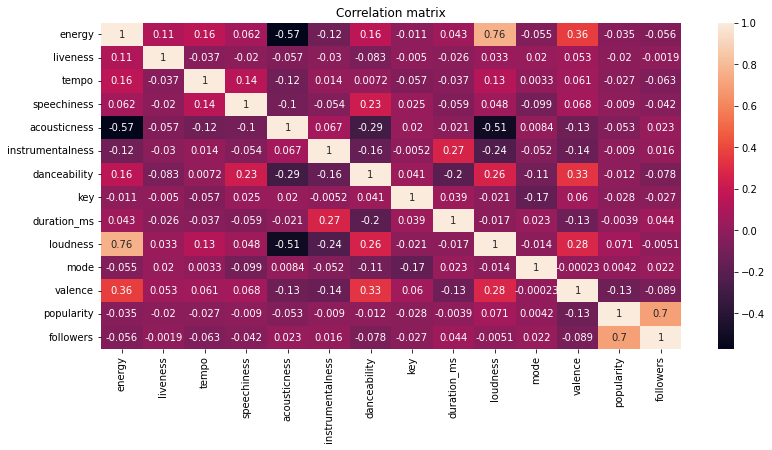

In [11]:
#Checking if the parameters are correlated
plt.figure(figsize = (13, 6))
corrMatrix = variables.corr(method ='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation matrix')
plt.show()

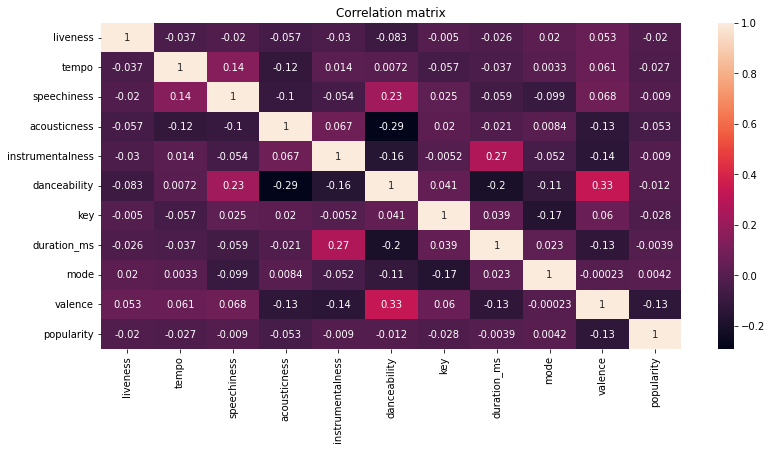

In [12]:
#Removing 'energy','loudness' and 'followers' to avoid multicolinearity
variables2=df[['liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','duration_ms','mode','valence','popularity']]
plt.figure(figsize = (13, 6))
corrMatrix = variables2.corr(method ='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation matrix')
plt.show()

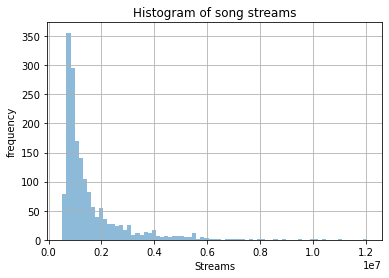

In [13]:
#Histogram of streams
streams=df['max streams']
plt.hist(streams,'auto',alpha=0.5)
plt.xlabel('Streams')
plt.ylabel('frequency')
plt.title('Histogram of song streams')
plt.grid(True)
plt.show()

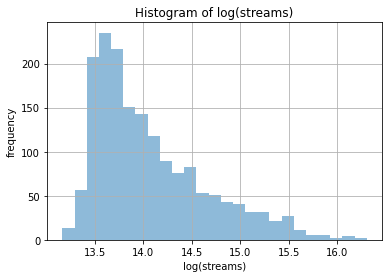

In [14]:
#Histogram of log(streams)
log_streams=np.log(streams)
plt.hist(log_streams,'auto',alpha=0.5)
plt.xlabel('log(streams)')
plt.ylabel('frequency')
plt.title('Histogram of log(streams)')
plt.grid(True)
plt.show()

In [15]:
#Regression with log scale to facilitate visualization
Y=log_streams
s=np.shape(Y)
const=np.ones(s)

live=df['liveness']
tempo=df['tempo']
speech=df['speechiness']
acoust=df['acousticness']
instr=df['instrumentalness']
dance=df['danceability']
key=df['key']
duration=df['duration_ms']
mode=df['mode']
valence=df['valence']
popularity=df['popularity']
X=np.column_stack((const, live, tempo, speech, acoust, instr, dance, key, duration, mode, valence, popularity))

model=sm.OLS(Y,X)
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            max streams   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     18.63
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.30e-35
Time:                        18:37:58   Log-Likelihood:                -1388.3
No. Observations:                1716   AIC:                             2801.
Df Residuals:                    1704   BIC:                             2866.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7148      0.173     73.373      0.0

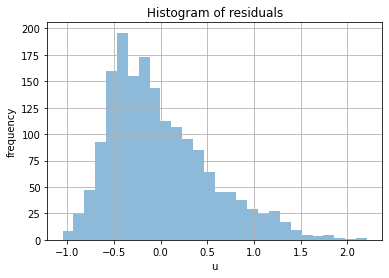

In [16]:
#Residuals
u=results.resid
plt.hist(u,'auto',alpha=0.5)
plt.xlabel('u')
plt.ylabel('frequency')
plt.title('Histogram of residuals')
plt.grid(True)
plt.show()

In [17]:
#Equation of log(streams)
beta=results.params
print(round(beta,2))

const    12.71
x1        0.08
x2       -0.00
x3       -0.34
x4        0.13
x5        0.20
x6       -0.20
x7       -0.01
x8       -0.00
x9        0.00
x10       0.22
x11       0.02
dtype: float64


In [18]:
#Values range of each parameter
coef=round(beta,2)
mini=[round(min(live),2),round(min(tempo),2),round(min(speech),2),round(min(acoust),2),round(min(instr),2),round(min(dance),2),round(min(key),2),round(min(duration),2),round(min(mode),2),round(min(valence),2),round(min(popularity),2)]
maxi=[round(max(live),2),round(max(tempo),2),round(max(speech),2),round(max(acoust),2),round(max(instr),2),round(max(dance),2),round(max(key),2),round(max(duration),2),round(max(mode),2),round(max(valence),2),round(max(popularity),2)]
avg=[round(np.mean(live),2),round(np.mean(tempo),2),round(np.mean(speech),2),round(np.mean(acoust),2),round(np.mean(instr),2),round(np.mean(dance),2),round(np.mean(key),2),round(np.mean(duration),2),round(np.mean(mode),2),round(np.mean(valence),2),round(np.mean(popularity),2)]

range=pd.DataFrame({"coef":coef[1:12],"min":mini,"max":maxi,"avg":avg})

print(range)

     coef       min        max        avg
x1   0.08      0.02       0.96       0.17
x2  -0.00     46.49     207.48     122.17
x3  -0.34      0.02       0.86       0.13
x4   0.13      0.00       0.99       0.26
x5   0.20      0.00       0.96       0.01
x6  -0.20      0.07       0.97       0.67
x7  -0.01      0.00      11.00       5.34
x8  -0.00  46837.00  943529.00  203040.18
x9   0.00      0.00       1.00       0.59
x10  0.22      0.03       0.98       0.49
x11  0.02     38.00     100.00      81.73


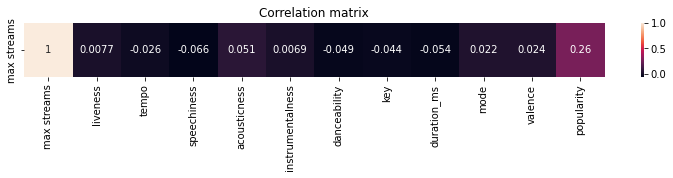

In [19]:
#Streams correlation with each parameter
correlation=df[['max streams','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','duration_ms','mode','valence','popularity']]
plt.figure(figsize = (13, 1))
corrMatrix = correlation.corr(method ='pearson')[0:1]
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation matrix')
plt.show()

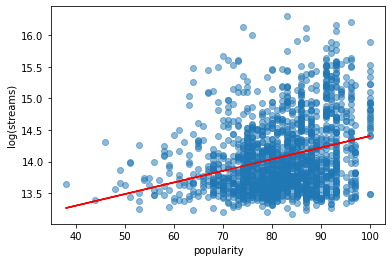

In [20]:
#Parameter that influences streams the most is x11 (popularity)
x = popularity
fig, ax = plt.subplots()
_ = ax.scatter(x, Y,alpha=0.5)
z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r")
plt.xlabel('popularity')
plt.ylabel('log(streams)')
plt.show()